In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [45]:
df = pd.read_csv("../data/Data_Weather.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [46]:
df.shape


(145460, 23)

In [47]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [48]:

df['RainTomorrow'].value_counts()



RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64

In [49]:
df['RainTomorrow'].value_counts(normalize=True) * 100

RainTomorrow
No     78.085384
Yes    21.914616
Name: proportion, dtype: float64

In [50]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [51]:
df.isnull().sum().sort_values(ascending=False)


Date             0
WindSpeed3pm     0
RainToday        0
Temp3pm          0
Temp9am          0
Cloud3pm         0
Cloud9am         0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed9am     0
Location         0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Sunshine         0
Evaporation      0
Rainfall         0
MaxTemp          0
MinTemp          0
RainTomorrow     0
dtype: int64

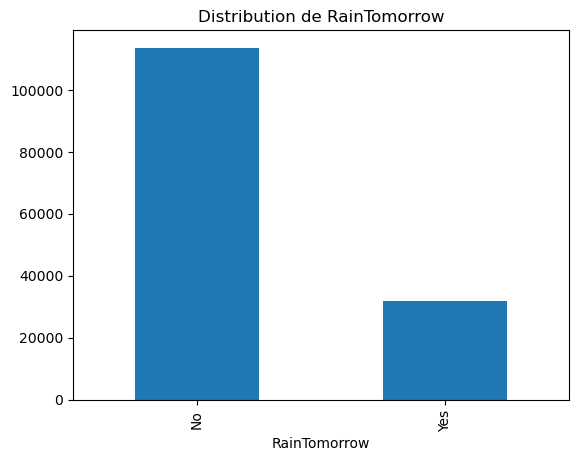

In [52]:
df['RainTomorrow'].value_counts().plot(kind='bar')
plt.title("Distribution de RainTomorrow")
plt.show()

In [53]:
df = df.drop(columns=['Location', 'Date'], errors='ignore')


In [54]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']


In [55]:
y = y.map({'Yes': 1, 'No': 0})


In [56]:
y.value_counts()


RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

In [57]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

print("Colonnes catégorielles :", categorical_cols)
print("Colonnes numériques :", numerical_cols)

Colonnes catégorielles : Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')
Colonnes numériques : Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


# Data Prepocessing

### Implement de valeurs manquantes



In [58]:
from sklearn.impute import SimpleImputer

# Valeurs manquantes
# Numériques → médiane
num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Catégorielles → plus fréquente
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])


### Transformation des valeurs categoricals to numerical

In [59]:
from sklearn.preprocessing import OneHotEncoder

#Encodage des valeurs categoricielles
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cat = encoder.fit_transform(X[categorical_cols])
encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X.index
)

# Supprimer les colonnes originales et ajouter les encodées
X = X.drop(columns=categorical_cols)
X = pd.concat([X, encoded_cat_df], axis=1)

In [68]:
encoded_cat_df.head()

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Outliers


In [70]:

for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Limiter les valeurs en dehors des bornes
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)


### Normalized or Transformed

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### Removing duplicates

In [ ]:
duplicates = X.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")
X = X.drop_duplicates()
y = y[X.index]  


Nombre de doublons : 267


### Feature Selection

In [77]:

corr_matrix = X[numerical_cols].corr()
# On peut supprimer les colonnes très corrélées (corr > 0.9)


### Class Balancing


In [ ]:
y.value_counts(normalize=True)


RainTomorrow
0    0.780506
1    0.219494
Name: proportion, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res.value_counts(normalize=True)


RainTomorrow
0    0.5
1    0.5
Name: proportion, dtype: float64

# Data Split

### Separate into 80% training and 20% testing

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Séparation train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)


In [ ]:
# Création du modèle
model_log = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement
model_log.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model_log.predict(X_test)
y_pred
# array([0, 0, 1, 0, 1, 1, ...])



array([1, 1, 1, ..., 0, 0, 1])

In [89]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Matrice de confusion
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Rapport de classification (précision, rappel, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7824178248400617
Confusion Matrix:
 [[17910  4755]
 [ 5108 17557]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78     22665
           1       0.79      0.77      0.78     22665

    accuracy                           0.78     45330
   macro avg       0.78      0.78      0.78     45330
weighted avg       0.78      0.78      0.78     45330



In [ ]:
y_prob = model_log.predict_proba(X_test)[:,1]  # probabilité pour la classe 1
y_prob



array([0.94766763, 0.94984655, 0.96436373, ..., 0.03289664, 0.37096842,
       0.89525283])

### Affichage du diagramme class non-equilibre

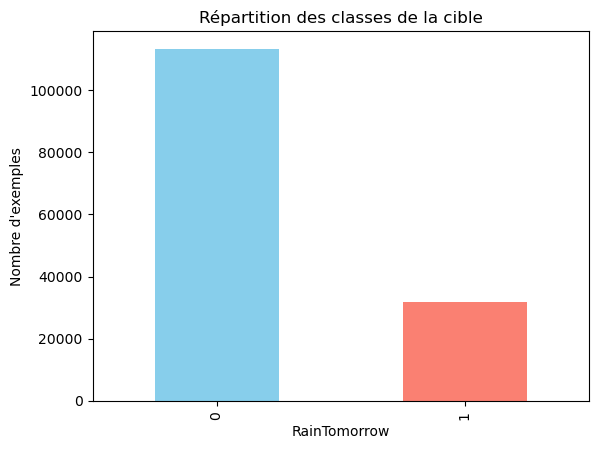

In [ ]:
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Répartition des classes de la cible")
plt.ylabel("Nombre d'exemples")
plt.show()



### Affichage du diagramme class equilibre

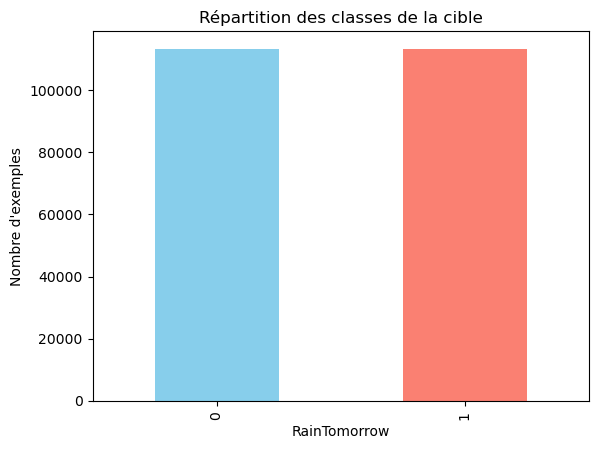

In [96]:
y_res.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Répartition des classes de la cible")
plt.ylabel("Nombre d'exemples")
plt.show()

# Modele K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Choix du meilleur k

In [98]:
# Définir le modèle de base
knn = KNeighborsClassifier()

# Chercher le meilleur k (nombre de voisins)
param_grid = {'n_neighbors': list(range(3, 21, 2))}  # k = 3,5,7,...19

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Meilleur k :", grid_search.best_params_)

Meilleur k : {'n_neighbors': 3}


### Creation du modele KNN final

In [99]:
best_k = grid_search.best_params_['n_neighbors']

model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [100]:
y_pred_knn = model_knn.predict(X_test)
y_pred_prob_knn = model_knn.predict_proba(X_test)[:,1]

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report KNN:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC KNN:", roc_auc_score(y_test, y_pred_prob_knn))


Accuracy KNN: 0.8605338627840282
Confusion Matrix KNN:
 [[16820  5845]
 [  477 22188]]
Classification Report KNN:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     22665
           1       0.79      0.98      0.88     22665

    accuracy                           0.86     45330
   macro avg       0.88      0.86      0.86     45330
weighted avg       0.88      0.86      0.86     45330

ROC-AUC KNN: 0.92457813376222
